In [203]:

import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
import numpy as np
import math
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### clean keywords

In [204]:
pathfire='/content/disaster_tweets.csv'
df = pd.read_csv(pathfire)
df

# cleaning process

df.drop('id',inplace=True, axis = 1)
print("Unterschiedliche Keywords vor cleaning: ",df.keyword.nunique())
df_unique=pd.DataFrame(data=df.keyword.unique(),  columns=["col1"])
df_unique.dropna(inplace=True)

stemmer = PorterStemmer()
df_unique['keyword_stem']=df_unique['col1'].apply(lambda x: stemmer.stem(x))


print("Unterschiedliche Keywords nach stemming: ",df_unique.keyword_stem.nunique())
df_unique.keyword_stem.unique()


# manuelles vereinheitlichen
einheits_dict={'burning%20build':'fire',
               'buildings%20burn':'fire',
               'buildings%20on%20fir':'fire',
               'bloodi': 'blood',
               'bleed': 'blood',
               'bush%20fir':'fire',
               'dead':'death',
               'explod':'explos',
               'blown%20up':'explos',
               'bridge%20collaps':'damag',
               'demolish':'damag',
               'demolit':'damag',
               'injuri':'injur',
               'apocalyps':'catastroph',
               'armageddon':'catastroph',
               'arsonist':'arson',
               'mass%20murder':'mass%20murd',
               'panick':'panic',
               'disast':'catastroph',
               'armi':'militari',
               'earthquak':'catastroph',
               'hellfir':'fire',
               'tornado':'hurrican',
               'cyclon':'hurrican',
               'terrorist':'terror',
               'nuclear%20disast':'meltdown',
               'tsunami':'flood',
               'surviv': 'survivor',
               'traumatis':'trauma',
               'wild%20fir': 'wildfir',
               'twister':'hurrican',
               'typhoon':'hurrican',
               'suicide%20bomb':'bomb',
               'whirlwind':'hurrican',
               'blizzard':'hurican',
               'collid':'collis',
               'destruct':'destroy',
               'devast':'destroy',
               'mass%20murd':'massacr',
               'crash':'crush',
               'sunk':'sink',
               'lava':'volcano'
               }


df_unique['keywords_final']=df_unique['keyword_stem'].replace(einheits_dict)

print("Unterschiedliche Keywords nach stemming und manuellem einsortieren: ",df_unique.keywords_final.nunique())
df_unique.keywords_final.unique()


Unterschiedliche Keywords vor cleaning:  221
Unterschiedliche Keywords nach stemming:  166
Unterschiedliche Keywords nach stemming und manuellem einsortieren:  126


array(['ablaz', 'accid', 'aftershock', 'airplane%20accid', 'ambul',
       'annihil', 'catastroph', 'militari', 'arson', 'attack', 'avalanch',
       'battl', 'bioterror', 'blaze', 'blood', 'blew%20up', 'blight',
       'hurican', 'explos', 'body%20bag', 'bomb', 'damag', 'fire', 'burn',
       'casualti', 'chemical%20emerg', 'cliff%20fal', 'collaps', 'collis',
       'crush', 'curfew', 'hurrican', 'danger', 'death', 'debri', 'delug',
       'derail', 'desol', 'destroy', 'deton', 'displac', 'drought',
       'drown', 'dust%20storm', 'electrocut', 'emerg', 'emergency%20plan',
       'emergency%20servic', 'engulf', 'epicentr', 'evacu', 'eyewit',
       'famin', 'fatal', 'fear', 'fire%20truck', 'first%20respond',
       'flame', 'flatten', 'flood', 'forest%20fir', 'hail', 'hailstorm',
       'harm', 'hazard', 'heat%20wav', 'hijack', 'hostag', 'injur',
       'inund', 'landslid', 'volcano', 'lightn', 'loud%20bang', 'massacr',
       'mass%20murd', 'mayhem', 'meltdown', 'mudslid', 'natural%2

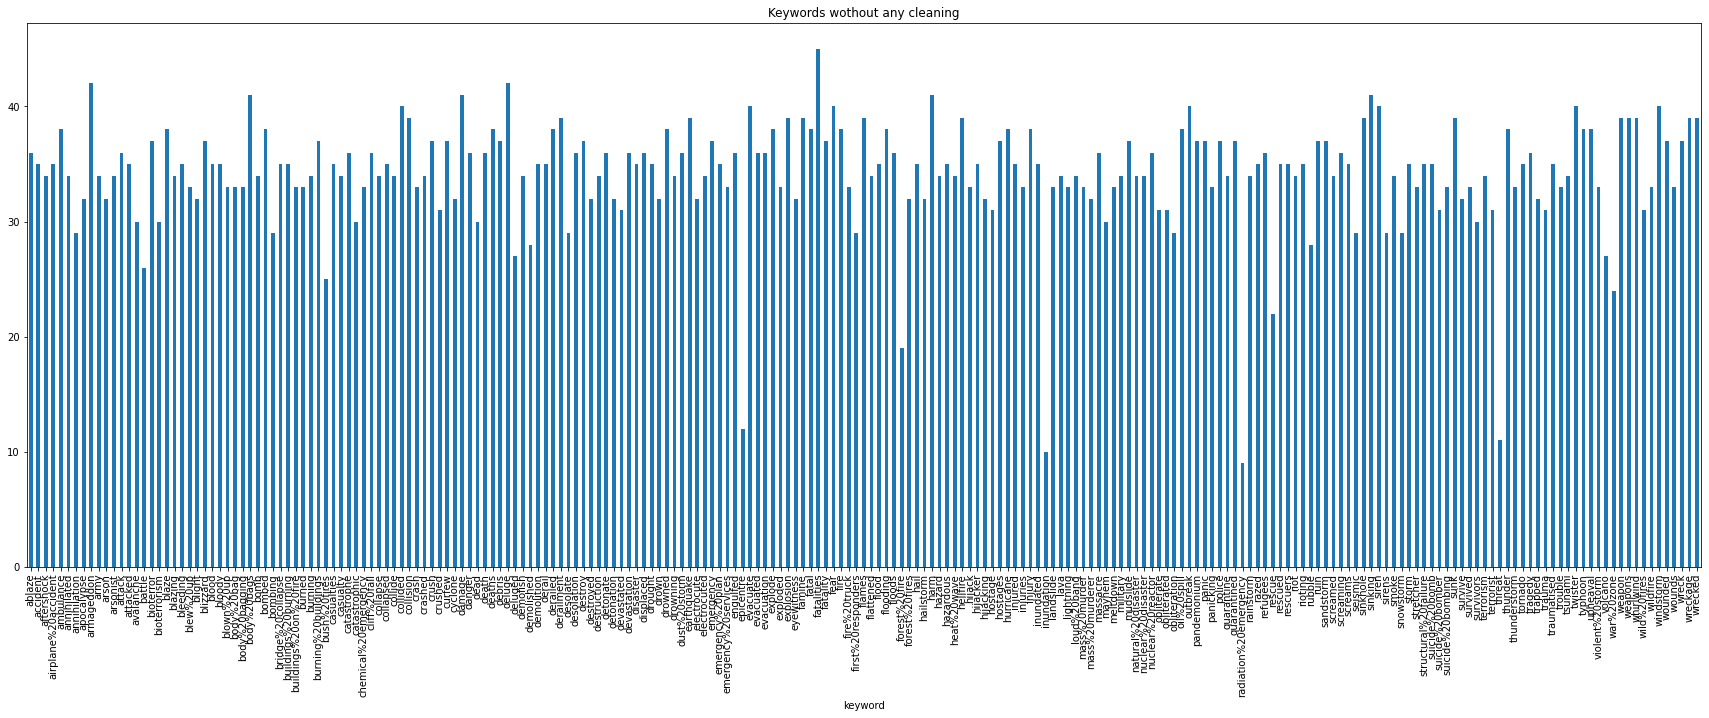

In [205]:


plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title('Keywords wothout any cleaning')
plt.show()

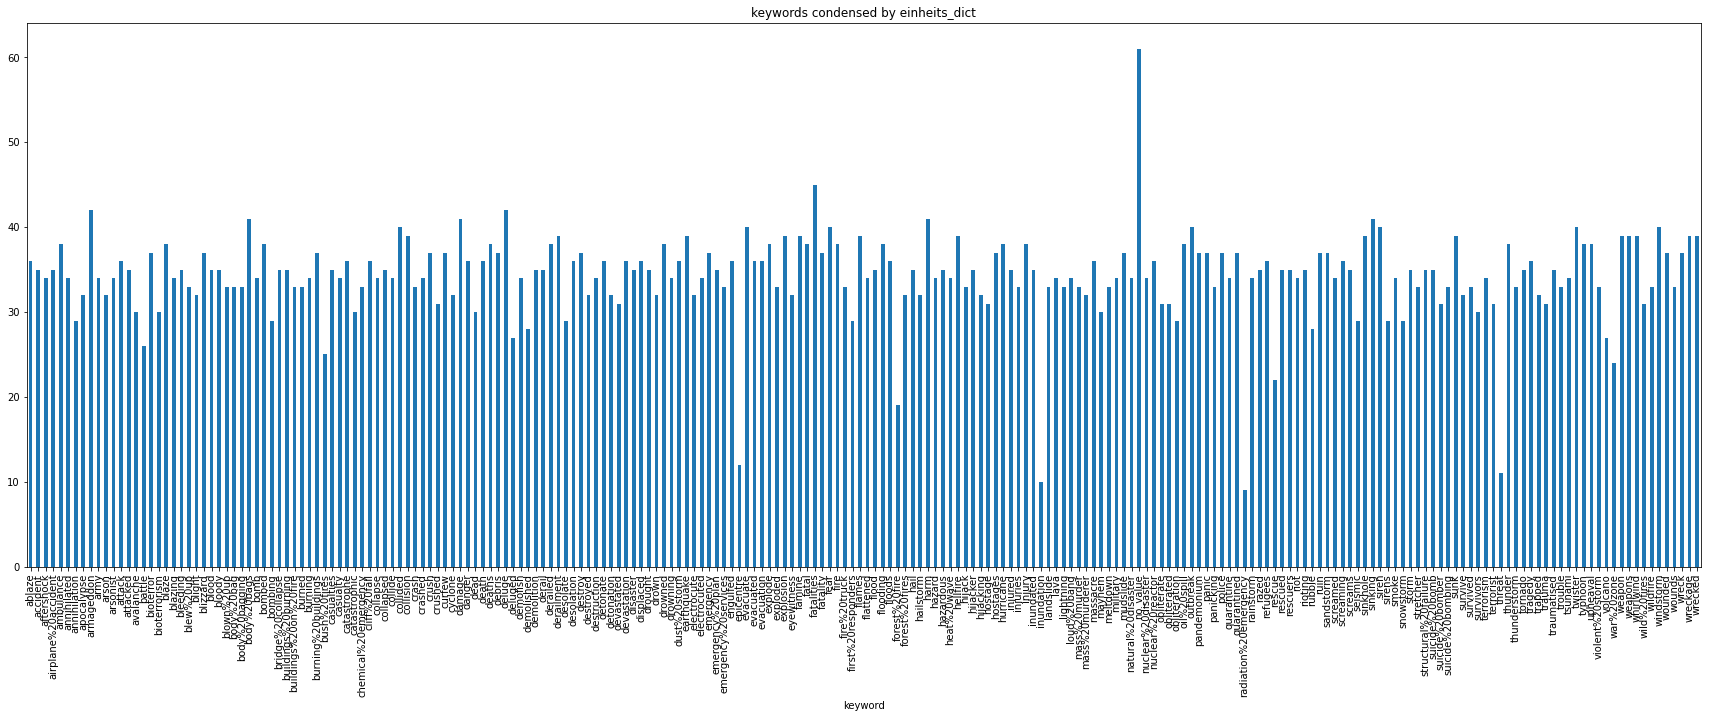

In [206]:
import numpy as np
import math
df.fillna('no_value',inplace=True)
df['keyword_stem']=df['keyword'].apply(lambda x: stemmer.stem(x))
df['keywords_final']=df['keyword_stem'].replace(einheits_dict)
plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title("keywords condensed by einheits_dict")
plt.show()

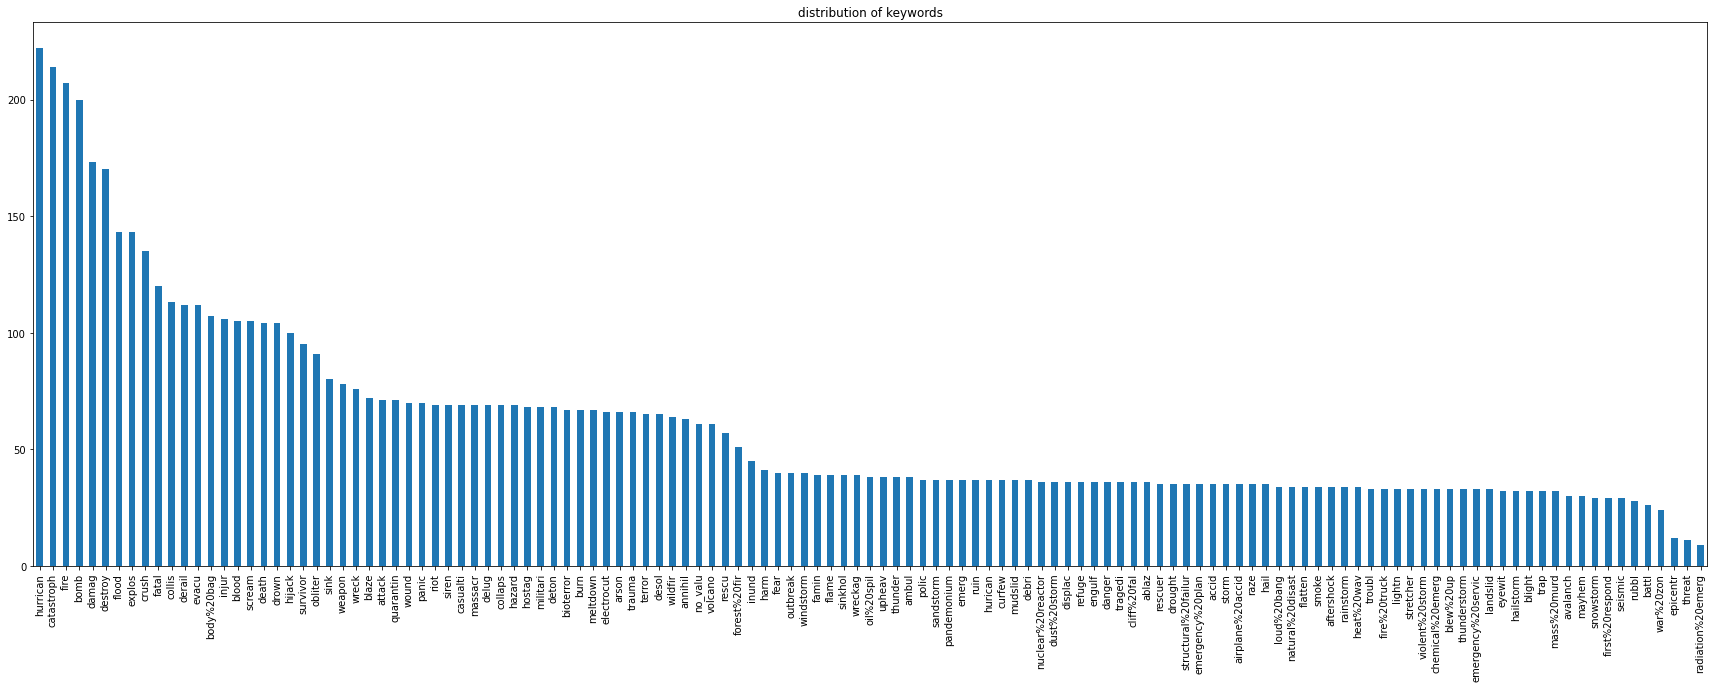

In [207]:
plt.figure(figsize=(30,10))
df['keywords_final'].value_counts().plot(kind='bar')

plt.title("distribution of keywords")
plt.show()

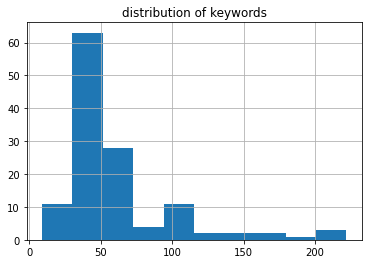

In [208]:
df['keywords_final'].value_counts().hist()
plt.title("distribution of keywords")
plt.show()

### clean text

In [213]:
# text cleaning

df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [240]:
# erase punctuation

def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")

  digi_punct = "[^a-zA-Z' ]"
  text = re.sub(digi_punct, " ", text)

  text = " ".join(text.split())

  text = text.lower()

  return text

In [215]:

df['clean']=df['text'].apply(lambda text: clean_text(text))

In [216]:
'''
# tokenize

tokenizer = nltk.tokenize.WordPunctTokenizer()

df['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))
'''

"\n# tokenize\n\ntokenizer = nltk.tokenize.WordPunctTokenizer()\n\ndf['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))\n"

In [217]:
df['clean']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to 'shelter in place' are ...
3       people receive wildfires evacuation orders in ...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m utc km s of volcano hawaii http t co zdtoyd ebj
7611    police investigating after an e bike collided ...
7612    the latest more homes razed by northern califo...
Name: clean, Length: 7613, dtype: object

In [218]:
# stemmer & stopwords

my_stopwords = stopwords.words('english')

df["clean"] = df["clean"].apply(
    lambda text: " ".join([stemmer.stem(word) for word in text.split() if word not in my_stopwords]))

Define Train & Test Data

In [219]:
from sklearn.model_selection import train_test_split
X = df['clean']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(6090,) (6090,) (1523,) (1523,)


Select Vectorizer

In [220]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(X_train)

In [221]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

In [222]:
tfidf_matrix

<6090x16381 sparse matrix of type '<class 'numpy.float64'>'
	with 66334 stored elements in Compressed Sparse Row format>

MODEL Logistic Regression /TFIDF Vectorizer

In [223]:
from sklearn.model_selection import cross_val_score

def pred_scores(model):
  model.fit(X_train, y_train)
  print(f"Model: {model}\n")
  print(f"Training set score: {model.score(X_train, y_train)}")
  print(f"CV score          : {cross_val_score(model, X_train, y_train, cv=5).mean()}")

Text(0.5, 1.0, 'pred for countV & LogReg')

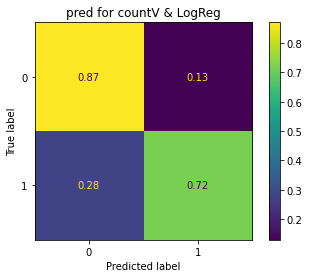

In [224]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf = make_pipeline(TfidfVectorizer(),LogisticRegression())
cross_val_score(pipe_tfidf, X_train, y_train).mean()

pipe_tfidf.fit(X_train, y_train)
plot_confusion_matrix(pipe_tfidf,X_test,y_test, normalize='true')
plt.title('pred for countV & LogReg')

MODEL Logistic Regression /TFIDF Vectorizer

In [319]:
pipe_count = make_pipeline(CountVectorizer(),LogisticRegression())
cv_LR = cross_val_score(pipe_count, X_train, y_train).mean()
pipe_count.fit(X_train, y_train)
LR_Score = pipe_count.score(X_test, y_test)
s_predcit_LR = pipe_count.predict(X_test)

print(cv_LR, LR_Score )
pred_scores(pipe_count)

0.7898193760262726 0.814182534471438
Model: Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                         

Text(0.5, 1.0, 'pred for countV & LogReg')

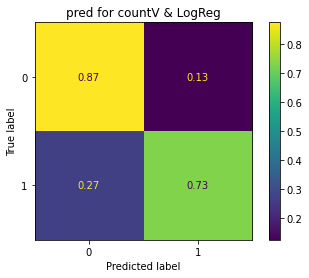

In [226]:
from sklearn.metrics import plot_confusion_matrix

pipe_count.fit(X_train, y_train)
plot_confusion_matrix(pipe_count,X_test,y_test, normalize='true')
plt.title('pred for countV & LogReg')


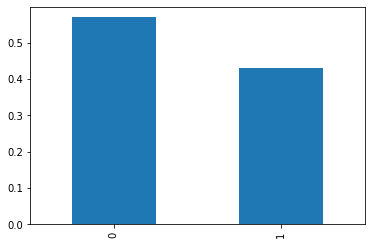

In [227]:
# distribution of y

df.target.value_counts(normalize=True).plot(kind='bar')

### new approach: Day2

MODEL XGBOOST Classifier

In [228]:
!pip install xgboost

0.7334975369458128
Model: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3

Text(0.5, 1.0, 'pred for tfidf & XGB')

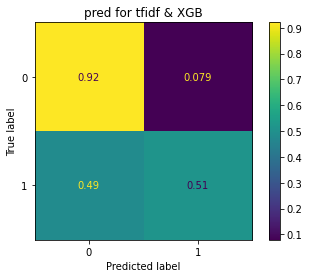

In [229]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
pipe_tfidf_xgb = make_pipeline(TfidfVectorizer(),XGBClassifier())
cv_XGB = cross_val_score(pipe_tfidf_xgb, X_train, y_train).mean()
pipe_tfidf_xgb = pipe_tfidf_xgb.fit(X_train, y_train)
XGB_Score = pipe_tfidf_xgb.score(X_test, y_test)
s_predcit_XGB = pipe_tfidf_xgb.predict(X_test)

print(cv_XGB)

print(pred_scores(pipe_tfidf_xgb))

pipe_tfidf_xgb.fit(X_train, y_train)
plot_confusion_matrix(pipe_tfidf_xgb,X_test,y_test, normalize='true')
plt.title('pred for tfidf & XGB')

In [230]:
import numpy as np

param_grid = {
    "XGB__n_estimators": [50, 100],
    "XGB__max_depth": [5, 10, 25],
    "XGB__reg_alpha": [1, 1.3, 2],
    "XGB__reg_lamba": [1, 1.3, 2],
    "XGB__subsample": np.arange(0.8, 1.1, 0.2)
}

MODEL Gridsearch + XGB

In [231]:
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('XGB', XGBClassifier())])


#xgbc = XGBClassifier()
gridsearch = GridSearchCV(pipe, param_grid, verbose=1, n_jobs=-1)
gridsearch.fit(X_train, y_train)

gridsearch.best_score_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

MODEL Decistion Tree

0.7523809523809524 0.7544320420223244
Model: Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...y=None)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
           

Text(0.5, 1.0, 'pred for tfidf & DT')

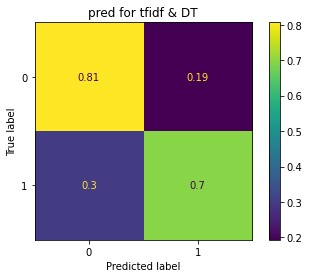

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
pipe_tfidf_DT = make_pipeline(CountVectorizer(),DecisionTreeClassifier())
cv_dt = cross_val_score(pipe_tfidf_DT, X_train, y_train).mean()
pipe_tfidf_DT.fit(X_train, y_train)
DT_Score = pipe_tfidf_DT.score(X_test, y_test)
s_predcit_DT = pipe_tfidf_DT.predict(X_test)

print(cv_dt, DT_Score)
pred_scores(pipe_tfidf_DT)

plot_confusion_matrix(pipe_tfidf_DT,X_test,y_test, normalize='true')
plt.title('pred for tfidf & DT')

MODEL KNN

In [311]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
pipe_tfidf_KN = make_pipeline(CountVectorizer(),KNeighborsClassifier(n_neighbors=5))
cv_KN = cross_val_score(pipe_tfidf_KN, X_train, y_train).mean()

pipe_tfidf_KN.fit(X_train, y_train)

KN_Score = pipe_tfidf_KN.score(X_test, y_test)
s_predcit_KN = pipe_tfidf_KN.predict(X_test)

print(cv_KN, KN_Score)

pred_scores(pipe_tfidf_KN)

0.6719211822660099 0.6841759684832567
Model: Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                   

MODEL Naive Bayes /TFIDF Vectorizer

Crossvalidation: 0.789655172413793 Test_Score 0.8168089297439265
Model: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=N

Text(0.5, 1.0, 'pred for tfidf & NAIVE_Bayes')

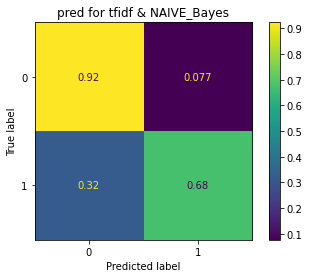

In [234]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


pipe_Bay = make_pipeline(TfidfVectorizer(), MultinomialNB(fit_prior=True))
cvs = cross_val_score(pipe_Bay, X_train, y_train).mean()
pipe_Bay.fit(X_train, y_train)

score_Bay = pipe_Bay.score(X_test, y_test)
s_predcit = pipe_Bay.predict(X_test)

print('Crossvalidation:', cvs, 'Test_Score', score_Bay)
print(pred_scores(pipe_Bay))

plot_confusion_matrix(pipe_Bay,X_test,y_test, normalize='true')
plt.title('pred for tfidf & NAIVE_Bayes')

In [235]:
df['NB_target'] = pipe_Bay.predict(X)
df
b= confusion_matrix(df.target, df.NB_target)
b

array([[4190,  152],
       [ 743, 2528]])

Accuracy of NAIVE BAYES Classifier for different Tweet Kexwords

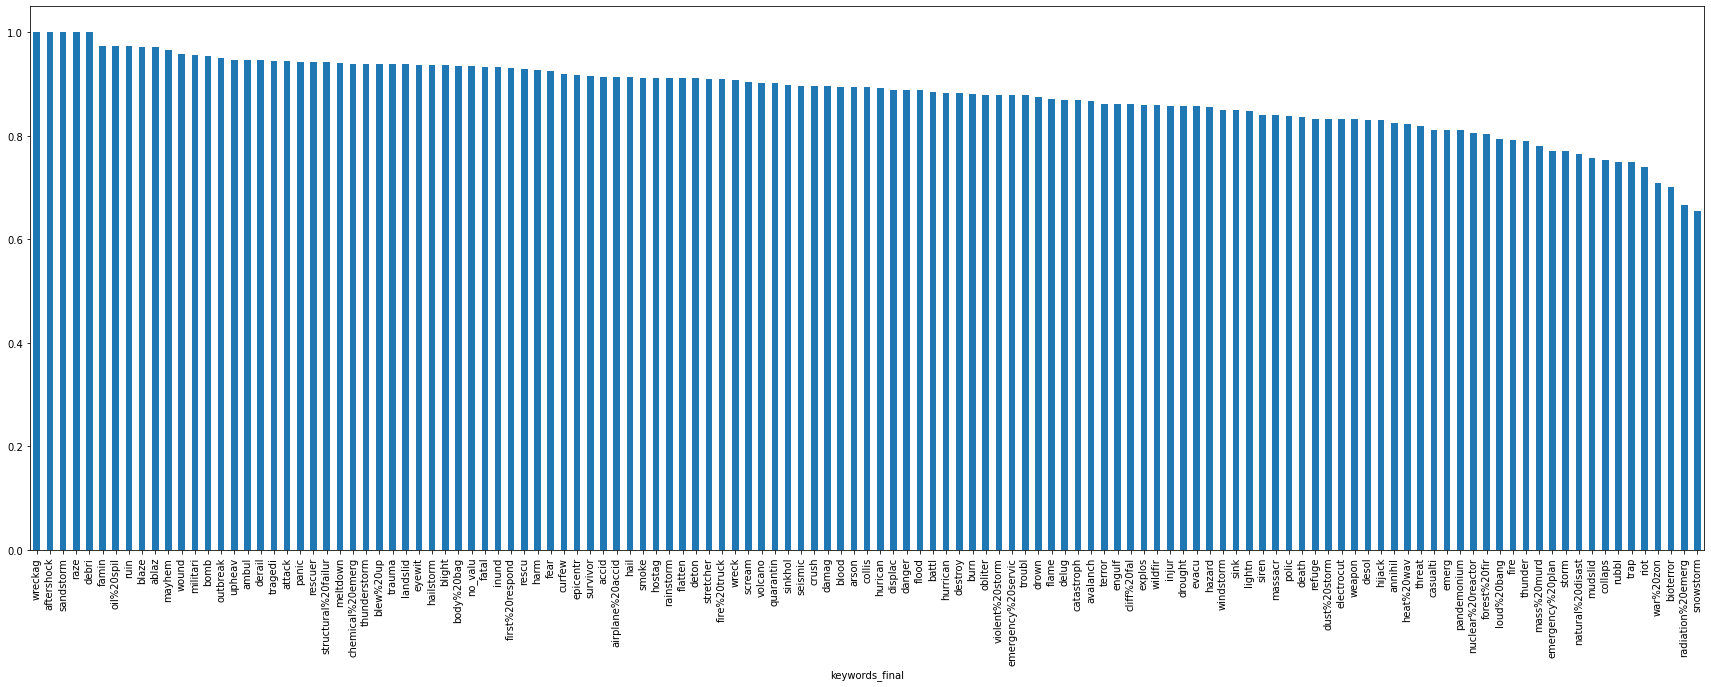

In [236]:
import numpy as np
import pandas as pd
df['accurate'] = np.where(df.target == df.NB_target, 1, 0)
df_keywords = df.groupby('keywords_final')['accurate'].agg(['sum', 'count'])
df_keywords['accuracy'] = df_keywords['sum'] / df_keywords['count']
plt.figure(figsize=(30,10))
#df_keywords['accuracy'].nsmallest(160).plot(kind='bar')
df_keywords['accuracy'].nlargest(160).plot(kind='bar')

MODEL  Voting (Logistic Regresiion and NAIVE BAYES)

In [312]:
from sklearn.ensemble import  VotingClassifier
model = Pipeline([
        ('tfidf', TfidfVectorizer()),    
        ('clf', VotingClassifier(estimators=[("pip1", MultinomialNB(fit_prior=True)), 
                                             ("pip2", LogisticRegression()),]))
    ])
cvs = cross_val_score(model, X_train, y_train).mean()
model.fit(X_train, y_train)
score_vot = model.score(X_test, y_test)
pred_vot = model.predict(X_test)
print(score_vot, cvs)

0.8095863427445831 0.7912972085385879


Pickeling the best model

In [313]:
import pickle
filename = 'Bayes.sav'
model = pipe_Bay
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
atze = loaded_model.predict(X_test)
print(atze)

[0 0 1 ... 0 0 0]


New tweet prediction with best model (NAIVE BAYES)

In [318]:

tweet = 'I cant have kids cuz I got in a bicycle accident &amp; split my testicles. its impossible for me to have kids MICHAEL YOU ARE THE FATHER'
ct = clean_text(tweet)
my_stopwords = stopwords.words('english')

sw = " ".join([stemmer.stem(word) for word in ct.split() if word not in my_stopwords])
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit(X)



loaded_model = pickle.load(open('Bayes.sav', 'rb'))

sw = [sw]
vorhersage = loaded_model.predict(sw)
print(tweet, vorhersage)

I cant have kids cuz I got in a bicycle accident &amp; split my testicles. its impossible for me to have kids MICHAEL YOU ARE THE FATHER [0]


Numeric encoding for Tweet-Keywords

In [378]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
texte = df.keywords_final
le.fit(texte)

le.classes_

numkeyword = le.fit_transform(texte)

df['numkeyword'] = numkeyword
df

,keyword,location,text,target,keyword_stem,keywords_final,clean,NB_target,accurate,numkeyword
0,no_value,no_value,Our Deeds are the Reason of this #earthquake M...,1,no_valu,no_valu,deed reason earthquak may allah forgiv us,1,1,79
1,no_value,no_value,Forest fire near La Ronge Sask. Canada,1,no_valu,no_valu,forest fire near la rong sask canada,1,1,79
2,no_value,no_value,All residents asked to 'shelter in place' are ...,1,no_valu,no_valu,resid ask 'shelter place' notifi offic evacu s...,1,1,79
3,no_value,no_value,"13,000 people receive #wildfires evacuation or...",1,no_valu,no_valu,peopl receiv wildfir evacu order california,1,1,79
4,no_value,no_value,Just got sent this photo from Ruby #Alaska as ...,1,no_valu,no_valu,got sent photo rubi alaska smoke wildfir pour ...,1,1,79
...,...,...,...,...,...,...,...,...,...,...
7608,no_value,no_value,Two giant cranes holding a bridge collapse int...,1,no_valu,no_valu,two giant crane hold bridg collaps nearbi home...,1,1,79
7609,no_value,no_value,@aria_ahrary @TheTawniest The out of control w...,1,no_valu,no_valu,aria ahrari thetawniest control wild fire cali...,1,1,79
7610,no_value,no_value,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,no_valu,no_valu,utc km volcano hawaii http co zdtoyd ebj,1,1,79
7611,no_value,no_value,Police investigating after an e-bike collided ...,1,no_valu,no_valu,polic investig e bike collid car littl portug ...,1,1,79


In [383]:
from sklearn.model_selection import train_test_split
X = df[['numkeyword','clean']]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(6090, 2) (6090,) (1523, 2) (1523,)
